In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
a=pd.read_csv('/content/Salary_Data.csv')
a

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
a.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
a.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [5]:
a.shape,a.ndim

((30, 2), 2)

In [6]:

print(f'The number of rows in dataset : {a.shape[0]}')

print(f'The number of columns in dataset : {a.shape[1]}')

print(f'The number of null values in the dataset  : \n{a.isnull().sum()}')

print(f'The years of experience columns is : {a["YearsExperience"].dtype}')

print(f'The Salary columns is : {a["Salary"].dtype}')

The number of rows in dataset : 30
The number of columns in dataset : 2
The number of null values in the dataset  : 
YearsExperience    0
Salary             0
dtype: int64
The years of experience columns is : float64
The Salary columns is : float64


In [7]:
x=a['YearsExperience']
y=a['Salary']

In [8]:
 x=x.values.reshape(-1,1)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [11]:
len(x_train),len(y_train)

(20, 20)

In [12]:
len(y_test),len(y_test)

(10, 10)

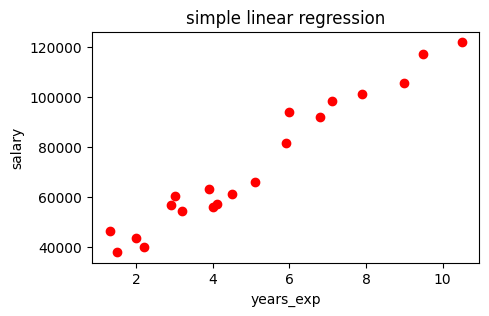

In [13]:
# EDA with training data

plt.figure(figsize=(5,3))
plt.title("simple linear regression")
plt.xlabel('years_exp')
plt.ylabel('salary')
plt.scatter(x_train , y_train,color = 'r')
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
reg=LinearRegression()

In [16]:
reg.fit(x_train,y_train)

LinearRegression()

In [17]:
reg.coef_

array([9426.03876907])

In [18]:
reg.intercept_

25324.33537924433

In [19]:
training_data = pd.DataFrame({'x_train':x_train.flatten(),'y_train':y_train})
training_data

,x_train,y_train
4,2.2,39891.0
16,5.1,66029.0
5,2.9,56642.0
13,4.1,57081.0
11,4.0,55794.0
22,7.9,101302.0
1,1.3,46205.0
2,1.5,37731.0
25,9.0,105582.0
3,2.0,43525.0


In [20]:
y_train_pred=reg.predict(x_train)
y_train_pred

array([ 46061.62067121,  73397.13310153,  52659.84780956,  63971.09433245,
        63028.49045554,  99790.04165494,  37578.18577904,  39463.39353286,
       110158.68430092,  44176.41291739,  92249.21063968, 114871.70368546,
        80937.96411679, 124297.74245453,  89421.39900895,  55487.65944028,
        62085.88657864,  67741.50984008,  81880.56799369,  53602.45168647])

In [21]:
training_data['y_train_pred']=y_train_pred


In [37]:
training_data.index

Index([4, 16, 5, 13, 11, 22, 1, 2, 25, 3, 21, 26, 18, 29, 20, 7, 10, 14, 19,
       6],
      dtype='int64')

In [38]:
s = 0
k = 0
for i in training_data.index:
  s = s + (training_data['y_train'][i] - training_data['y_train_pred'][i])**2
  k = k + (training_data['y_train'][i] - training_data['y_train'].mean())**2
print(1 - (s / k))

0.9549236946181227


In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
mean_squared_error(y_train,y_train_pred)

29793161.082422983

In [25]:
from sklearn.metrics import r2_score

In [36]:
r2_score(y_train,y_train_pred)*100

95.49236946181226

In [34]:
y_test_pred=reg.predict(x_test)
y_test_pred

array([115814.30756236,  71511.92534771, 102617.85328566,  75282.34085534,
        55487.65944028,  60200.67882482, 122412.53470072, 107330.8726702 ,
        63028.49045554,  35692.97802523])

In [28]:
test_data = pd.DataFrame({'x_test':x_test.flatten(),'y_test':y_test})
test_data

,x_test,y_test
27,9.6,112635.0
15,4.9,67938.0
23,8.2,113812.0
17,5.3,83088.0
8,3.2,64445.0
9,3.7,57189.0
28,10.3,122391.0
24,8.7,109431.0
12,4.0,56957.0
0,1.1,39343.0


In [29]:
test_data['y_test_pred']=y_test_pred

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
mean_squared_error(y_test,y_test_pred)

35301898.887134895

In [32]:
from sklearn.metrics import r2_score

In [35]:
r2_score(y_test,y_test_pred)*100

95.53063138044949